In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
import pandas as pd

In [8]:
ex_data_path = "/Users/jonathan.williams/Desktop/Stats_207_Final_Project/time_series_for_stock_price_prediction/data/cleaned/cleaned_AACI.csv"
#load data
data_df = pd.read_csv(ex_data_path)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.set_index('date', inplace=True)
data_df = data_df['close']

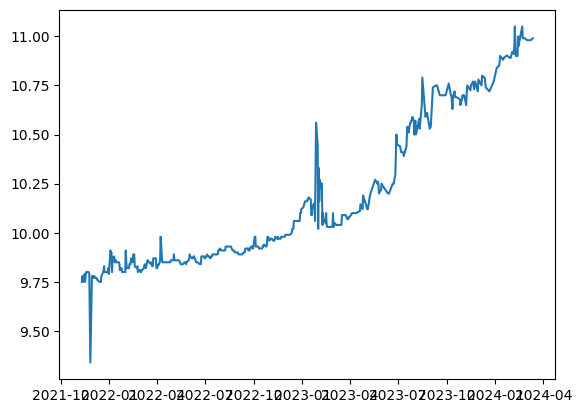

In [9]:
plt.plot(data_df)
plt.show()

## Unit Root Test

In [11]:
from arch.unitroot import ADF

adf = ADF(data_df.copy())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  1.651
P-value                         0.998
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# Variance Ratio Test

In [13]:
from arch.unitroot import VarianceRatio
vr = VarianceRatio(data_df.copy(), lags=12)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -1.745
P-value                         0.081
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
